In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import copy

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from scipy import stats
from IPython.display import Markdown as md

import statsmodels.api as sm
import statsmodels.formula.api as smf

original_df = pd.read_pickle('data_385k.pkl', compression='zip')

df = pd.read_pickle('POST_B8_data_385k.pkl', compression='zip')

df["energy_kcal_per_hundred"] = original_df["energy_kcal_per_hundred"].copy(deep=True)
original_df = None # lets free RAM

categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]

float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

int_cols = [column for column in df.columns if df.dtypes[column] == 'int']

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [2]:
text = """ 
 <h1><center><strong> F. Correlation analysis </strong></center></h1>

<h4> Data analysis usually entails studying the strength of correlations in the data. This is important because studying correlations helps to set expectations on which machine learning models can better capture these correlations. A correlation analysis can be quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on visualizations). Also, methods of correlation analysis can vary from one data type to another. In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data.
<br> <br>
Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables. Use the per_hundred columns and find their correlations with energy_per_hundred.
<br> <br>
Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots.
Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?
<br> <br>
Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced. </h4>
"""

md(text)

 
 <h1><center><strong> F. Correlation analysis </strong></center></h1>

<h4> Data analysis usually entails studying the strength of correlations in the data. This is important because studying correlations helps to set expectations on which machine learning models can better capture these correlations. A correlation analysis can be quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on visualizations). Also, methods of correlation analysis can vary from one data type to another. In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data.
<br> <br>
Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables. Use the per_hundred columns and find their correlations with energy_per_hundred.
<br> <br>
Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots.
Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?
<br> <br>
Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced. </h4>


In [3]:
per_hundreds_list = list()
for colname in numeric_cols:
    if colname.endswith("per_hundred"):
        per_hundreds_list.append(colname)

I want to have "energy_per_hundred" feature at very first position, so i have to get his current index , remove it and put it at index zero. After i will check the new position.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
index_energy_per_hundred = per_hundreds_list.index("energy_per_hundred")
print(index_energy_per_hundred)

4


In [5]:
per_hundreds_list.pop(5)

'fat_per_hundred'

In [6]:
per_hundreds_list.insert(0, "energy_per_hundred")
#print(per_hundreds_list)

Now that feature "energy_per_hundred" is at index zero, it will be more nice to study the correlation .
------------------------------------------------------------------------------------------------------

Lets begin with a quick look , we display the correlation heatmap:
-------------------------------------------------------------------

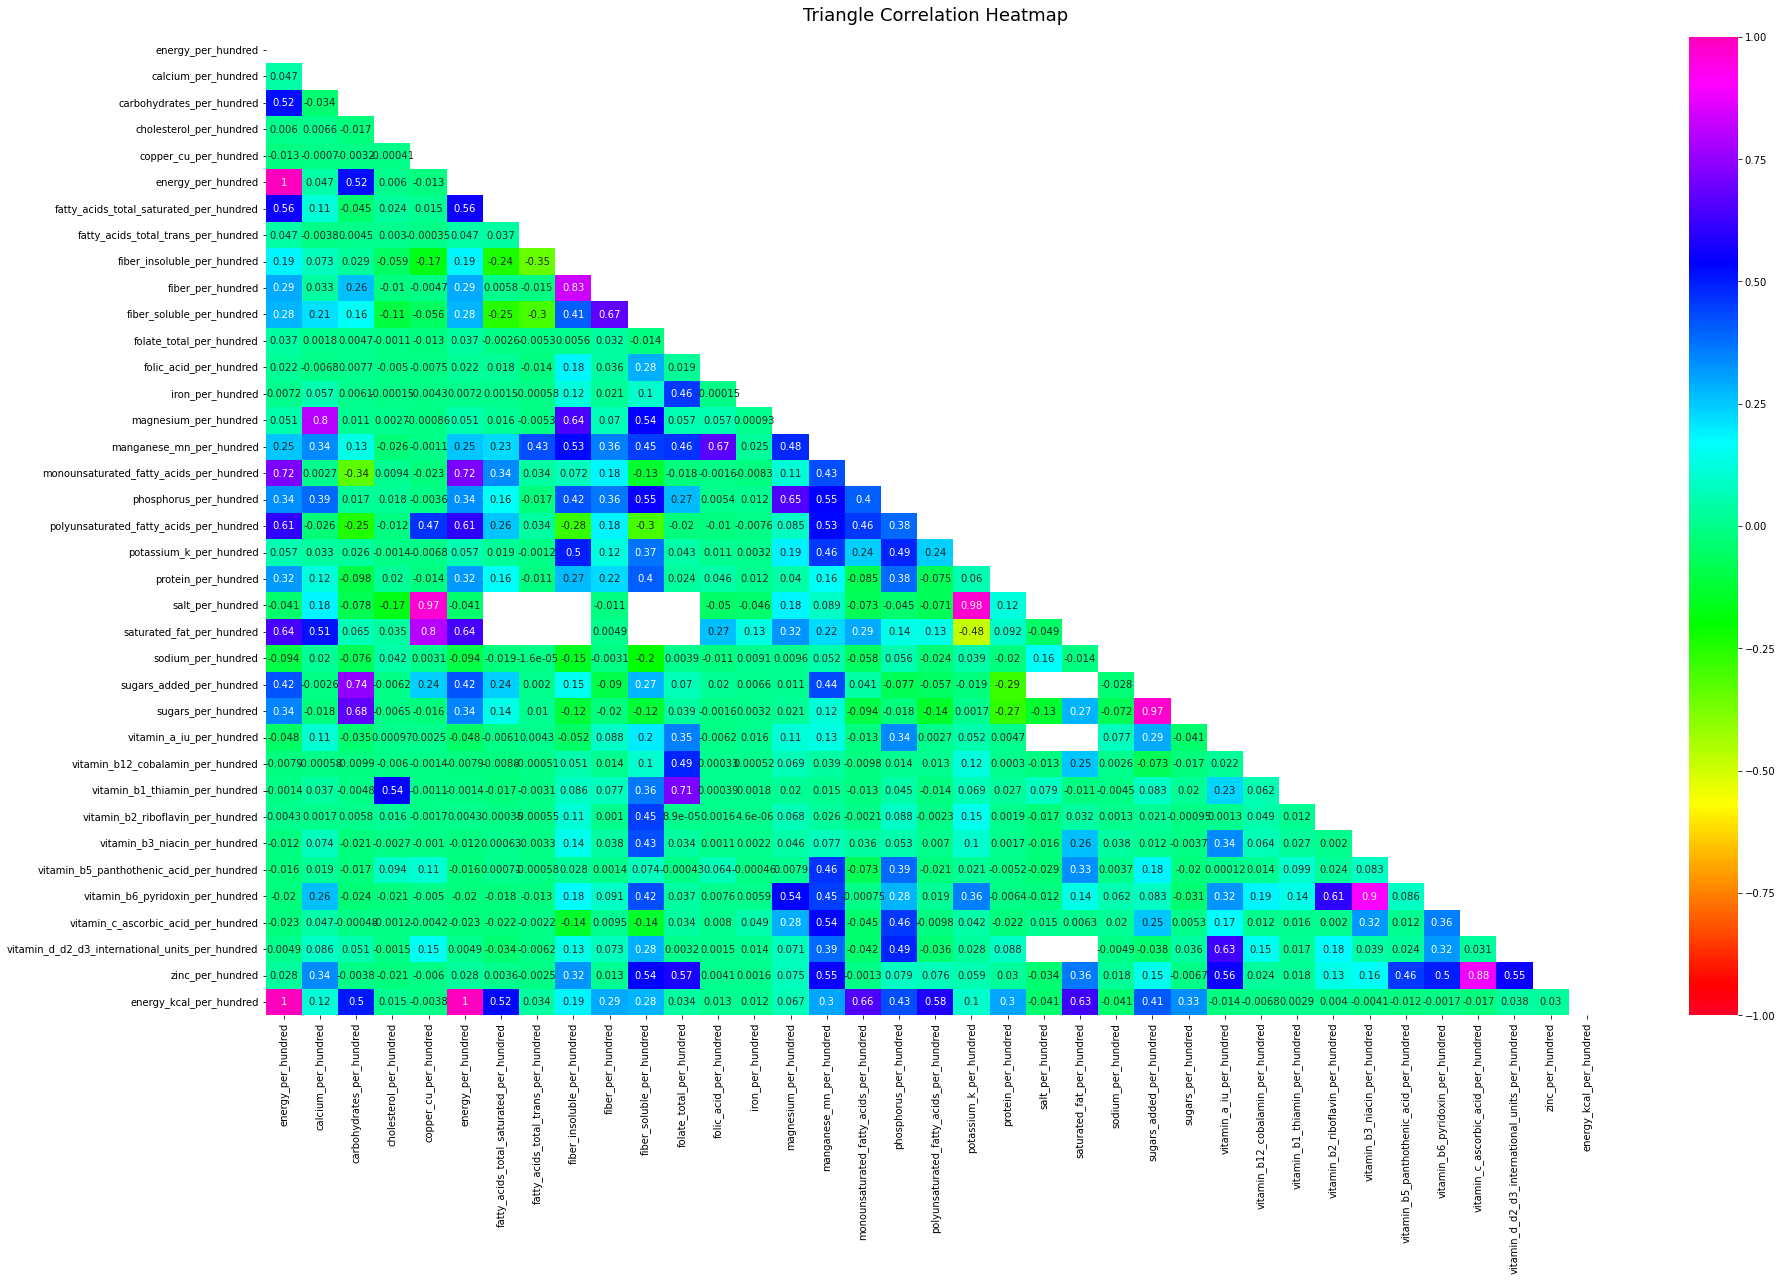

In [7]:
plt.figure(figsize=(30, 18))
mask = np.triu(np.ones_like(df[per_hundreds_list].corr(), dtype=np.bool))  # define the mask to set the values in the upper triangle to True

heatmap = sns.heatmap(df[per_hundreds_list].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='gist_rainbow')    # cmap='BrBG'

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Now, we can see the details of pairwise correlations of all columns of "per_hundred" list, with more precision:
---------------------------------------------------------------------------------------------------------------

In [8]:
per_hundreds_corr = df[per_hundreds_list].corr()

per_hundreds_corr

,energy_per_hundred,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,energy_kcal_per_hundred
energy_per_hundred,1.000000,0.046546,0.521926,0.006032,-0.012973,1.000000,0.561790,0.046793,0.187192,0.292853,0.280640,0.037211,0.022070,0.007177,0.051012,0.252964,0.717275,0.335088,0.608391,0.057442,0.318131,-0.041242,0.639881,-0.094432,0.418837,0.344801,-0.047706,-0.007876,-0.001374,0.004343,-0.012303,-0.016259,-0.020023,-0.022826,0.004897,0.027847,0.997277
calcium_per_hundred,0.046546,1.000000,-0.033599,0.006552,-0.000699,0.046546,0.109748,-0.003784,0.072893,0.032770,0.213622,0.001761,-0.006761,0.057154,0.803761,0.337463,0.002700,0.386994,-0.025744,0.033391,0.122813,0.181306,0.510313,0.019541,-0.002601,-0.018227,0.107106,-0.000581,0.036718,0.001655,0.074369,0.018739,0.263388,0.046637,0.086200,0.340461,0.115982
carbohydrates_per_hundred,0.521926,-0.033599,1.000000,-0.016707,-0.003227,0.521926,-0.045370,0.004484,0.028538,0.263398,0.159517,0.004668,0.007685,0.006115,0.011247,0.133934,-0.335350,0.017367,-0.248866,0.025823,-0.097863,-0.078397,0.065093,-0.075569,0.744814,0.675678,-0.034632,-0.009918,-0.004806,0.005771,-0.020693,-0.017337,-0.023516,-0.000485,0.050575,-0.003828,0.500937
cholesterol_per_hundred,0.006032,0.006552,-0.016707,1.000000,-0.000410,0.006032,0.024267,0.002995,-0.058556,-0.010426,-0.107887,-0.001053,-0.005009,-0.000155,0.002703,-0.025747,0.009385,0.018405,-0.012050,-0.001417,0.020229,-0.170888,0.034744,0.041635,-0.006159,-0.006464,0.000973,-0.005955,0.538471,0.015857,-0.002715,0.093704,-0.020583,-0.001199,-0.001478,-0.020579,0.014512
copper_cu_per_hundred,-0.012973,-0.000699,-0.003227,-0.000410,1.000000,-0.012973,0.014948,-0.000348,-0.167030,-0.004674,-0.055987,-0.013377,-0.007532,-0.004264,-0.000865,-0.001138,-0.023365,-0.003556,0.468128,-0.006803,-0.013524,0.966888,0.803983,0.003060,0.240032,-0.015918,0.002487,-0.001450,-0.001101,-0.001717,-0.001047,0.105026,-0.005045,-0.004225,0.152861,-0.005955,-0.003806
energy_per_hundred,1.000000,0.046546,0.521926,0.006032,-0.012973,1.000000,0.561790,0.046793,0.187192,0.292853,0.280640,0.037211,0.022070,0.007177,0.051012,0.252964,0.717275,0.335088,0.608391,0.057442,0.318131,-0.041242,0.639881,-0.094432,0.418837,0.344801,-0.047706,-0.007876,-0.001374,0.004343,-0.012303,-0.016259,-0.020023,-0.022826,0.004897,0.027847,0.997277
fatty_acids_total_saturated_per_hundred,0.561790,0.109748,-0.045370,0.024267,0.014948,0.561790,1.000000,0.037437,-0.239478,0.005813,-0.250700,-0.002621,0.018307,0.001480,0.016304,0.225009,0.341212,0.160399,0.256996,0.019330,0.162843,NaN,NaN,-0.018952,0.240636,0.135630,-0.006062,-0.008764,-0.017226,-0.000347,0.000630,0.000710,-0.017637,-0.021723,-0.034333,0.003644,0.524984
fatty_acids_total_trans_per_hundred,0.046793,-0.003784,0.004484,0.002995,-0.000348,0.046793,0.037437,1.000000,-0.350124,-0.014563,-0.297099,-0.005292,-0.014027,-0.000583,-0.005257,0.425149,0.034327,-0.016824,0.033945,-0.001206,-0.010690,NaN,NaN,-0.000016,0.001969,0.010316,0.004300,-0.000514,-0.003115,-0.000548,-0.003322,-0.000581,-0.013077,-0.002205,-0.006193,-0.002537,0.033857
fiber_insoluble_per_hundred

We sort it from very strong correlation to weaker ones.
--------------------------------------------------------------------------------

In [9]:
features_corel_energy_per100_sorted_descending = abs(df.corr()).sort_values('energy_per_hundred', ascending=False).index
print(features_corel_energy_per100_sorted_descending)

Index(['energy_per_hundred', 'energy_kcal_per_hundred', 'macros_saltfiber_sum',
       'fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred',
       'saturated_fat_per_hundred', 'polyunsaturated_fatty_acids_per_hundred',
       'fatty_acids_total_saturated_per_hundred', 'carbohydrates_per_hundred',
       'sugars_added_per_hundred', 'sugars_per_hundred',
       'phosphorus_per_hundred', 'protein_per_hundred', 'fiber_per_hundred',
       'fiber_soluble_per_hundred', 'manganese_mn_per_hundred',
       'fiber_insoluble_per_hundred', 'sodium_per_hundred',
       'potassium_k_per_hundred', 'magnesium_per_hundred',
       'vitamin_a_iu_per_hundred', 'fatty_acids_total_trans_per_hundred',
       'calcium_per_hundred', 'salt_per_hundred', 'folate_total_per_hundred',
       'zinc_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred',
       'folic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred',
       'vitamin_b5_panthothenic_acid_per_hundred', 'copper_cu_per_hundred',
       'vitam

As said previously, kcal is redudant and is not international unit ;  macros_saltfiber_sum is the column we engeenered ourselves. Lets skip those columns.
-------------------------------------------------------------------------------------------------------------------------------------------------------------

Lets see the 3 features most correlated and the three features less correlated to "energy_per_hundred" one.
------------------------------------------------------------------------------------------------------------

In [10]:
attribute = ['energy_per_hundred', 'fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred','vitamin_b2_riboflavin_per_hundred', 'vitamin_b1_thiamin_per_hundred']

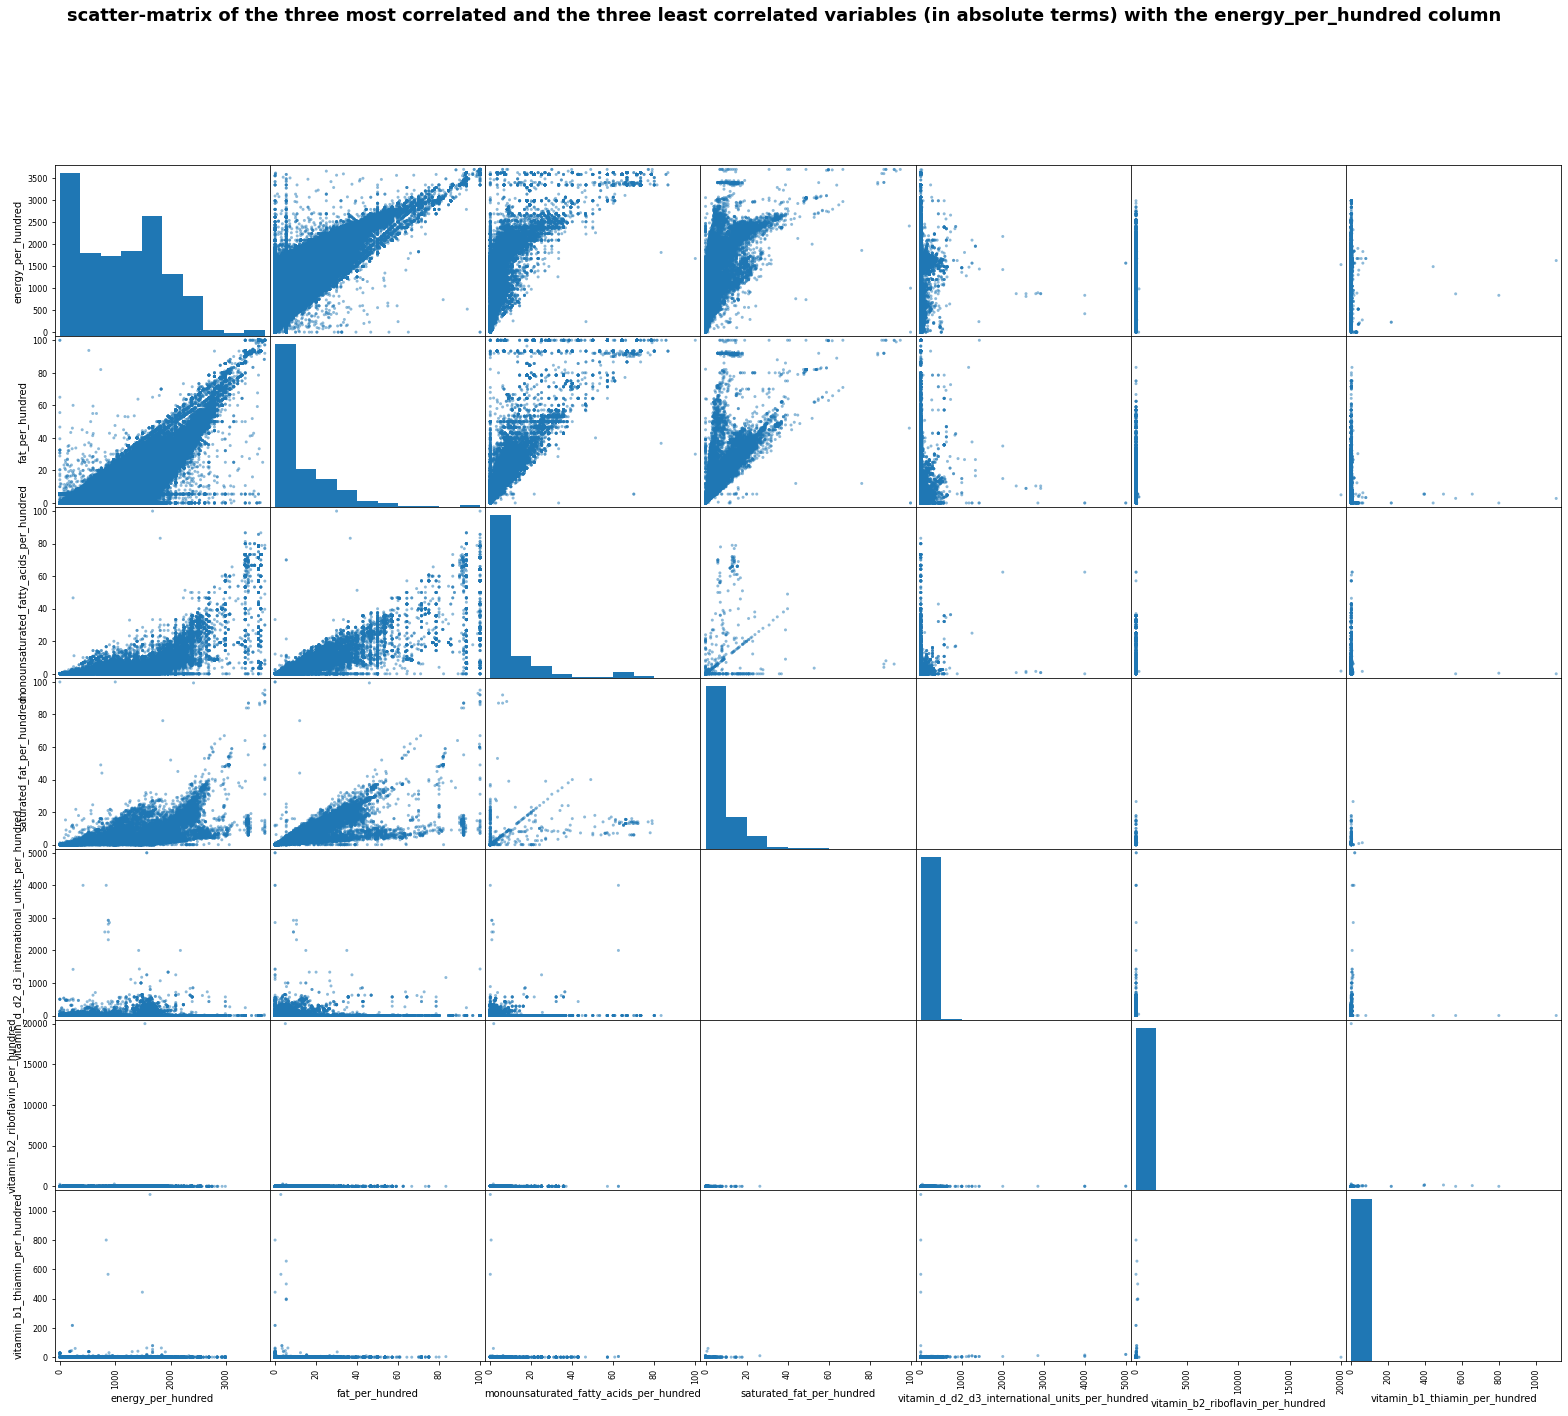

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[attribute], figsize = (27,22))
suptitle_str = 'scatter-matrix of the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column'
plt.suptitle(suptitle_str, fontweight='bold', fontsize=18)

plt.show()

In [12]:
six_most_correlated__energy_per_hundred_list = features_corel_energy_per100_sorted_descending[:6].to_list()
three_most_correlated__energy_per_hundred_list = features_corel_energy_per100_sorted_descending[3:6].to_list()

md(f" <h1><center><strong> Top 6 features most correlated to energy_per_hundred feature are in the list :   <font color='red'> {six_most_correlated__energy_per_hundred_list} </font>  </strong></center></h1>")

 <h1><center><strong> Top 6 features most correlated to energy_per_hundred feature are in the list :   <font color='red'> ['energy_per_hundred', 'energy_kcal_per_hundred', 'macros_saltfiber_sum', 'fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred'] </font>  </strong></center></h1>

In [13]:
md(f" <h1><center><strong> energy_per_hundred is implicit, energy_kcal_per_hundred is not a surprise, macros_saltfiber_sum is a engeenered feature we made ourselves </strong></center></h1>")


 <h1><center><strong> energy_per_hundred is implicit, energy_kcal_per_hundred is not a surprise, macros_saltfiber_sum is a engeenered feature we made ourselves </strong></center></h1>

In [14]:
md(f" <h1><center><strong> so we consider here the Top 3 features most correlated to energy_per_hundred feature are in the list : <font color='red'> {three_most_correlated__energy_per_hundred_list} </font>  </strong></center></h1>")


 <h1><center><strong> so we consider here the Top 3 features most correlated to energy_per_hundred feature are in the list : <font color='red'> ['fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred'] </font>  </strong></center></h1>

In [15]:
features_corel_energy_per100_sorted_ascending = abs(df.corr()).sort_values('energy_per_hundred', ascending=True).index

three_least_correlated__energy_per_hundred_list = features_corel_energy_per100_sorted_ascending[:3].to_list()
print(three_least_correlated__energy_per_hundred_list)

print(type(three_least_correlated__energy_per_hundred_list))

md(f" <h1><center><strong> Bottom 3 features least correlated to energy_per_hundred feature are in the list :   <font color='red'> {three_least_correlated__energy_per_hundred_list} </font>  </strong></center></h1>")



['vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred']
<class 'list'>


 <h1><center><strong> Bottom 3 features least correlated to energy_per_hundred feature are in the list :   <font color='red'> ['vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred'] </font>  </strong></center></h1>

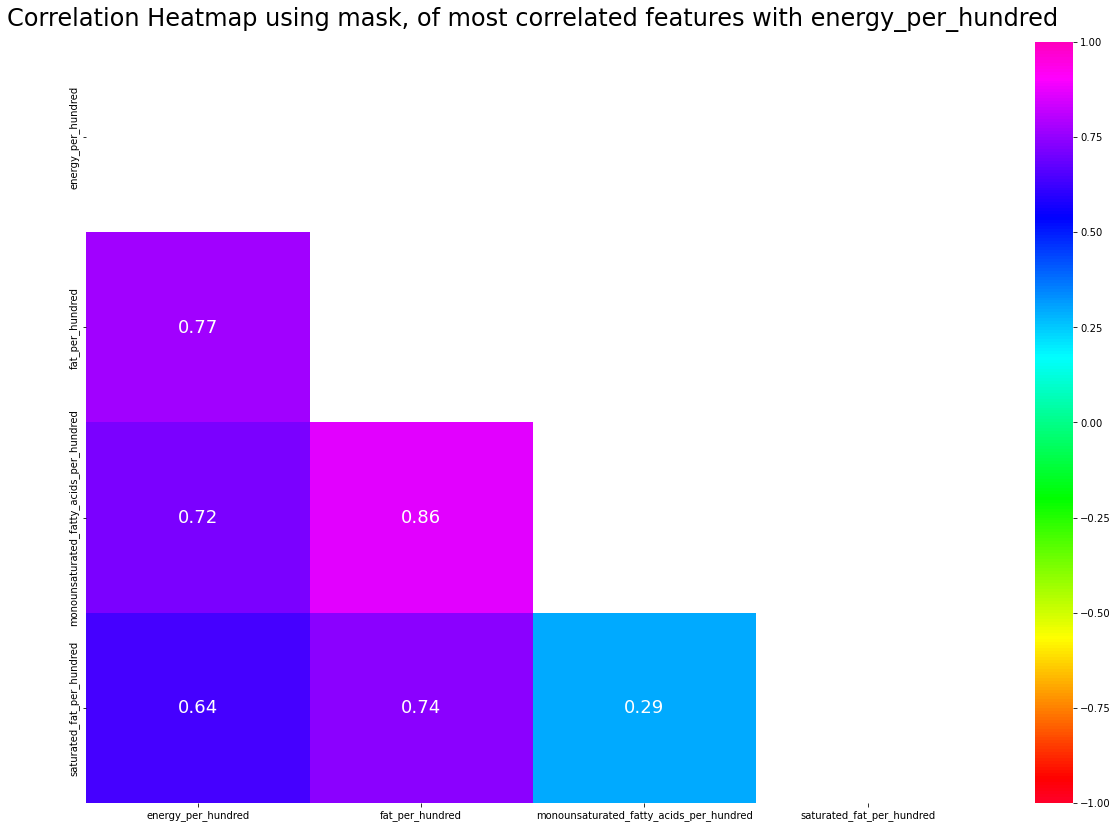

In [16]:
plt.figure(figsize=(20, 14))

my_columns = ['energy_per_hundred', 'fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred']

mask = np.triu(np.ones_like(df[my_columns].corr(), dtype=np.bool))

heatmap = sns.heatmap(df[my_columns].corr(), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":18}, cmap='gist_rainbow')

heatmap.set_title('Correlation Heatmap using mask, of most correlated features with energy_per_hundred', fontdict={'fontsize':24}, pad=16);

Now we want to get visualization about relationship to know if it is a linear or non-linear relationship.
-----------------------------------------------------------------------------------------------------------
We spots  some outliers thanks to annotations on the subplots, and study the impact before and after removing them.
-----------------------------------------------------------------------------------------------------------

In [17]:
varx= df['energy_per_hundred']

print(f" three_most_correlated__energy_per_hundred_list   {three_most_correlated__energy_per_hundred_list}  ")
print(f" three_least_correlated__energy_per_hundred_list   {three_least_correlated__energy_per_hundred_list}  ")

my__vary_list = three_most_correlated__energy_per_hundred_list + three_least_correlated__energy_per_hundred_list

print(f" my__vary_list   {my__vary_list}  ")

def process_slopes_and_interceps(dataframe=df, vary_list= my__vary_list):
    
    masks = []
    slopes = []
    intercepts = []    
    
    for i, vary in enumerate(vary_list):
        
        serie_y = dataframe[vary]
        mask = ~np.isnan(dataframe['energy_per_hundred']) & ~np.isnan(serie_y)

        masks.append(mask)

        slope, intercept, r_value, p_value, std_err = stats.linregress(varx[mask], serie_y[mask])
        
        slope = round(slope, 4) # lets round, four digits are enought here
        intercept = round(intercept, 4)

        slopes.append(slope)
        intercepts.append(intercept)  
    
    dico_slopes_and_intercepts = {'slopes': slopes, 'intercepts':intercepts, 'masks': masks}
    
    return dico_slopes_and_intercepts

def show_equation(slope, intercept):
    
    if intercept >=0 :
        return f"y={slope} x +  {intercept}"
    else:
        return f"y={slope} x  {intercept}"

def create_plots(dataframe, dico_slopes_and_intercepts, vary_list= my__vary_list, annotate_outliers=True):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False, figsize=(20, 15))
    for i, vary in enumerate(my__vary_list):
        
        serie_y = dataframe[vary]
        mask = dico_slopes_and_intercepts['masks'][i]
        
        slope = dico_slopes_and_intercepts['slopes'][i]
        intercept = dico_slopes_and_intercepts['intercepts'][i]
        
        ax = axes[i//3][i%3]
        
        sns.regplot(ax=ax, x= varx[mask], y= serie_y[mask], line_kws={'label': show_equation(slope, intercept)})
        ax.legend(prop={'weight':'bold'}, loc='upper right', bbox_to_anchor=(1, 1))        
        
        if annotate_outliers:
            
            if i==1:
                ax.annotate('Outlier example', xytext=(300, 85), xy = (1700,100),
                        arrowprops=dict(arrowstyle='-|>', fc="k", ec="k", lw=1.5, facecolor='blue', edgecolor='red'),bbox=dict(pad=13, facecolor="none", edgecolor="none"))
            
            if i==3:
                ax.annotate('Outlier example', xytext=(200, 650), xy = (850,800),
                        arrowprops=dict(arrowstyle='-|>', fc="k", ec="k", lw=1.5, facecolor='blue', edgecolor='red'),bbox=dict(pad=13, facecolor="none", edgecolor="none"))
            
            if i==4:
                ax.annotate('Outlier example', xytext=(1000, 17000), xy = (1550,20000),
                        arrowprops=dict(arrowstyle='-|>', fc="k", ec="k", lw=1.5, facecolor='blue', edgecolor='red'),bbox=dict(pad=13, facecolor="none", edgecolor="none"))
            
    if annotate_outliers:
        supertitle_begining = 'Vizualization of relationship between energy per hundred and 3 most and least correlated features with scatterplots: '
        supertitle_end = 'Example with some outliers spotted annotations'
        supertitle_concat = supertitle_begining + supertitle_end
        supertitle = supertitle_concat
    else:
        supertitle = "relationship between energy per hundred and 3 most and least correlated features after excludinf outliers with z-score >3 in original dataframe"
    
    fig.suptitle(supertitle) 
        
    plt.show()

 three_most_correlated__energy_per_hundred_list   ['fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred']  
 three_least_correlated__energy_per_hundred_list   ['vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred']  
 my__vary_list   ['fat_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'saturated_fat_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred']  


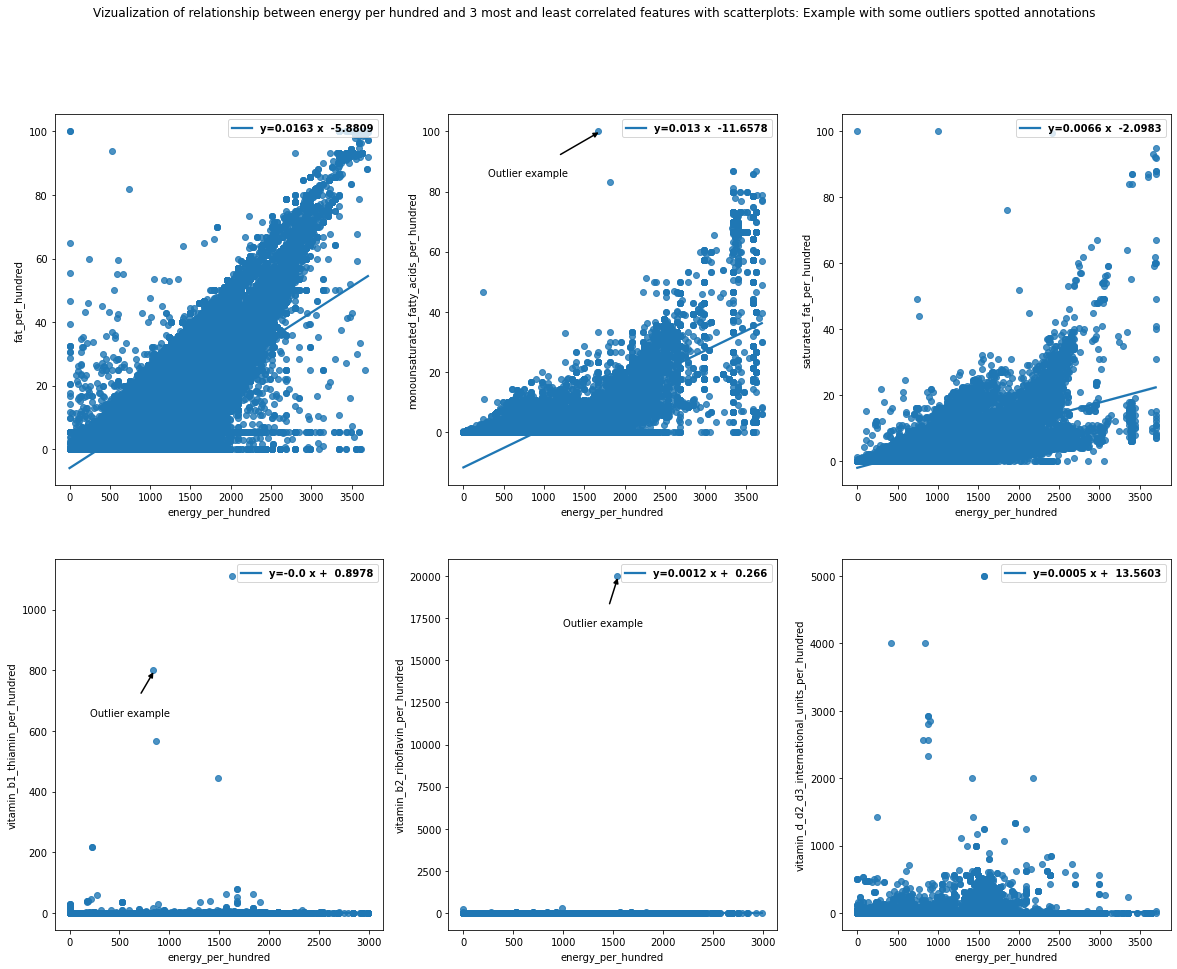

In [18]:
dico_slopes_and_intercepts = process_slopes_and_interceps(df, my__vary_list)
create_plots(df, dico_slopes_and_intercepts,annotate_outliers=True)

The true nature of the relationship  between energy_per_hundred and variables monounsaturated_fatty_acids_per_hundred, and saturated_fat_per_hundred are linear.
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Now we will re-use again a customized version of the the code from question B8 to exclude the outliers and see if there is an impact on the nature of relationships.
------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
threshold = 3.0
features_list = ['fat_per_hundred','monounsaturated_fatty_acids_per_hundred','saturated_fat_per_hundred','vitamin_b1_thiamin_per_hundred','vitamin_b2_riboflavin_per_hundred','vitamin_d_d2_d3_international_units_per_hundred']

feature_name = "salt_per_hundred"
feature_serie = df[feature_name]

for feature_name in features_list:
    feature_serie = df[feature_name]
    
    mean_serie = np.mean(feature_serie)
    std_serie = np.std(feature_serie)    
    
    print(f" BEFORE excluding outliers with z-score > {threshold}  ;    {feature_name} serie has mean {round(mean_serie, 2)}  and has std. deviation  {round(std_serie, 2)}  "  )
         
    i=0
    serie_outliers_count = 0
    for i in range(0, df.shape[0]):
        cell = feature_serie[i]
        z = (cell - mean_serie)/std_serie

        if z >= threshold:
            serie_outliers_count += 1
            
            df.at[i, feature_name] = np.nan
    
    mean_serie_after = np.mean(feature_serie)
    std_serie_after = np.std(feature_serie)    
    
    print(f"  {feature_name} serie found \x1b[31m {serie_outliers_count} \x1b[0m  outliers"  )
    print(f" AFTER attributing np.nan value to outliers cells,  {feature_name} serie has mean {round(mean_serie_after, 2)}  and has std. deviation  {round(std_serie_after, 2)}  \n\n"  )    

 BEFORE excluding outliers with z-score > 3.0  ;    fat_per_hundred serie has mean 11.86  and has std. deviation  16.16  
  fat_per_hundred serie found  6614   outliers
 AFTER attributing np.nan value to outliers cells,  fat_per_hundred serie has mean 10.54  and has std. deviation  12.86  


 BEFORE excluding outliers with z-score > 3.0  ;    monounsaturated_fatty_acids_per_hundred serie has mean 8.29  and has std. deviation  14.25  
  monounsaturated_fatty_acids_per_hundred serie found  1701   outliers
 AFTER attributing np.nan value to outliers cells,  monounsaturated_fatty_acids_per_hundred serie has mean 5.95  and has std. deviation  8.22  


 BEFORE excluding outliers with z-score > 3.0  ;    saturated_fat_per_hundred serie has mean 5.86  and has std. deviation  8.22  
  saturated_fat_per_hundred serie found  288   outliers
 AFTER attributing np.nan value to outliers cells,  saturated_fat_per_hundred serie has mean 5.34  and has std. deviation  6.8  


 BEFORE excluding outliers w

Lets process again after having exclude outliers thanks to na.nan assignation and lets display it
--------------------------------------------------------------------------------------------------

In [20]:
dico_slopes_and_intercepts = process_slopes_and_interceps(df, my__vary_list)

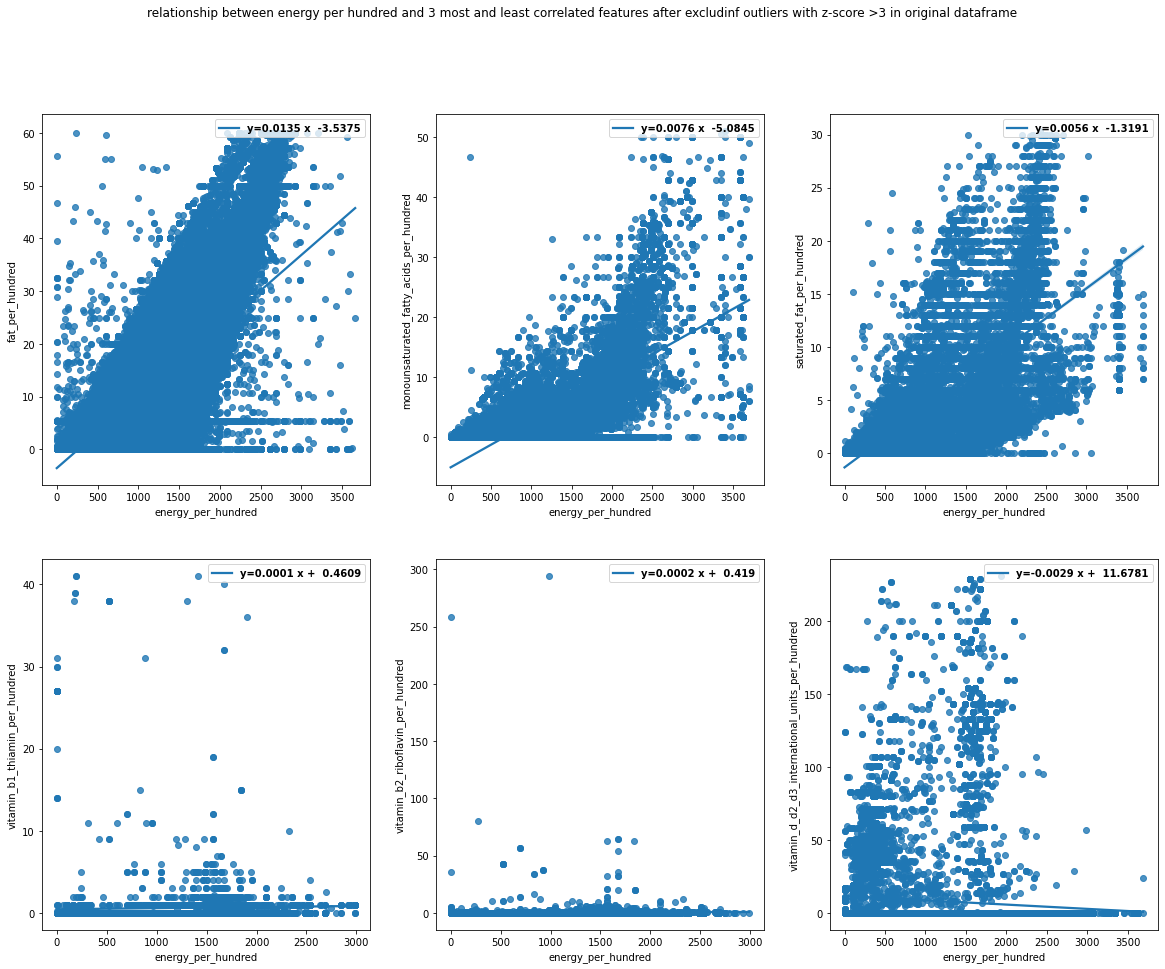

In [21]:
create_plots(df, dico_slopes_and_intercepts,annotate_outliers=False)

After removing the two spotted outliers, we can see in their respective subplots legends that the impact on the slopes. 
-----------------------------------------------------------------------------------------------------------------------
Despite the strong impact on vitamine D correlation, it remains a non linear relationship.
-------------------------------------------------------------------------------------------

Now we are going to make a feature from energy_per_hundred, which will call energy_level. First have a look on df["energy_per_hundred"].describe()
---------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
df["energy_per_hundred"].describe()

count    334100.000000
mean       1111.019269
std         780.736224
min           0.000000
25%         368.190000
50%        1103.000000
75%        1673.600000
max        3700.000000
Name: energy_per_hundred, dtype: float64

First quartile will be considered as low energy content , last one as high.
----------------------------------------------------------------------------

In [23]:
q1 = df["energy_per_hundred"].describe()[4]
q4 = df["energy_per_hundred"].describe()[6]

df['energy_level'] = df.apply(lambda row: 'low' if row.energy_per_hundred <= q1 else ('high' if row.energy_per_hundred > q4 else 'medium'), axis = 1)

Lets have a look on the ten first entries and their energy levels
------------------------------------------------------------------

In [24]:
df['energy_level'].head(10)

0    medium
1    medium
2    medium
3      high
4      high
5    medium
6      high
7    medium
8    medium
9      high
Name: energy_level, dtype: object

Now we want to plot the distribution of the products by their country per energy level
--------------------------------------------------------------------------------------

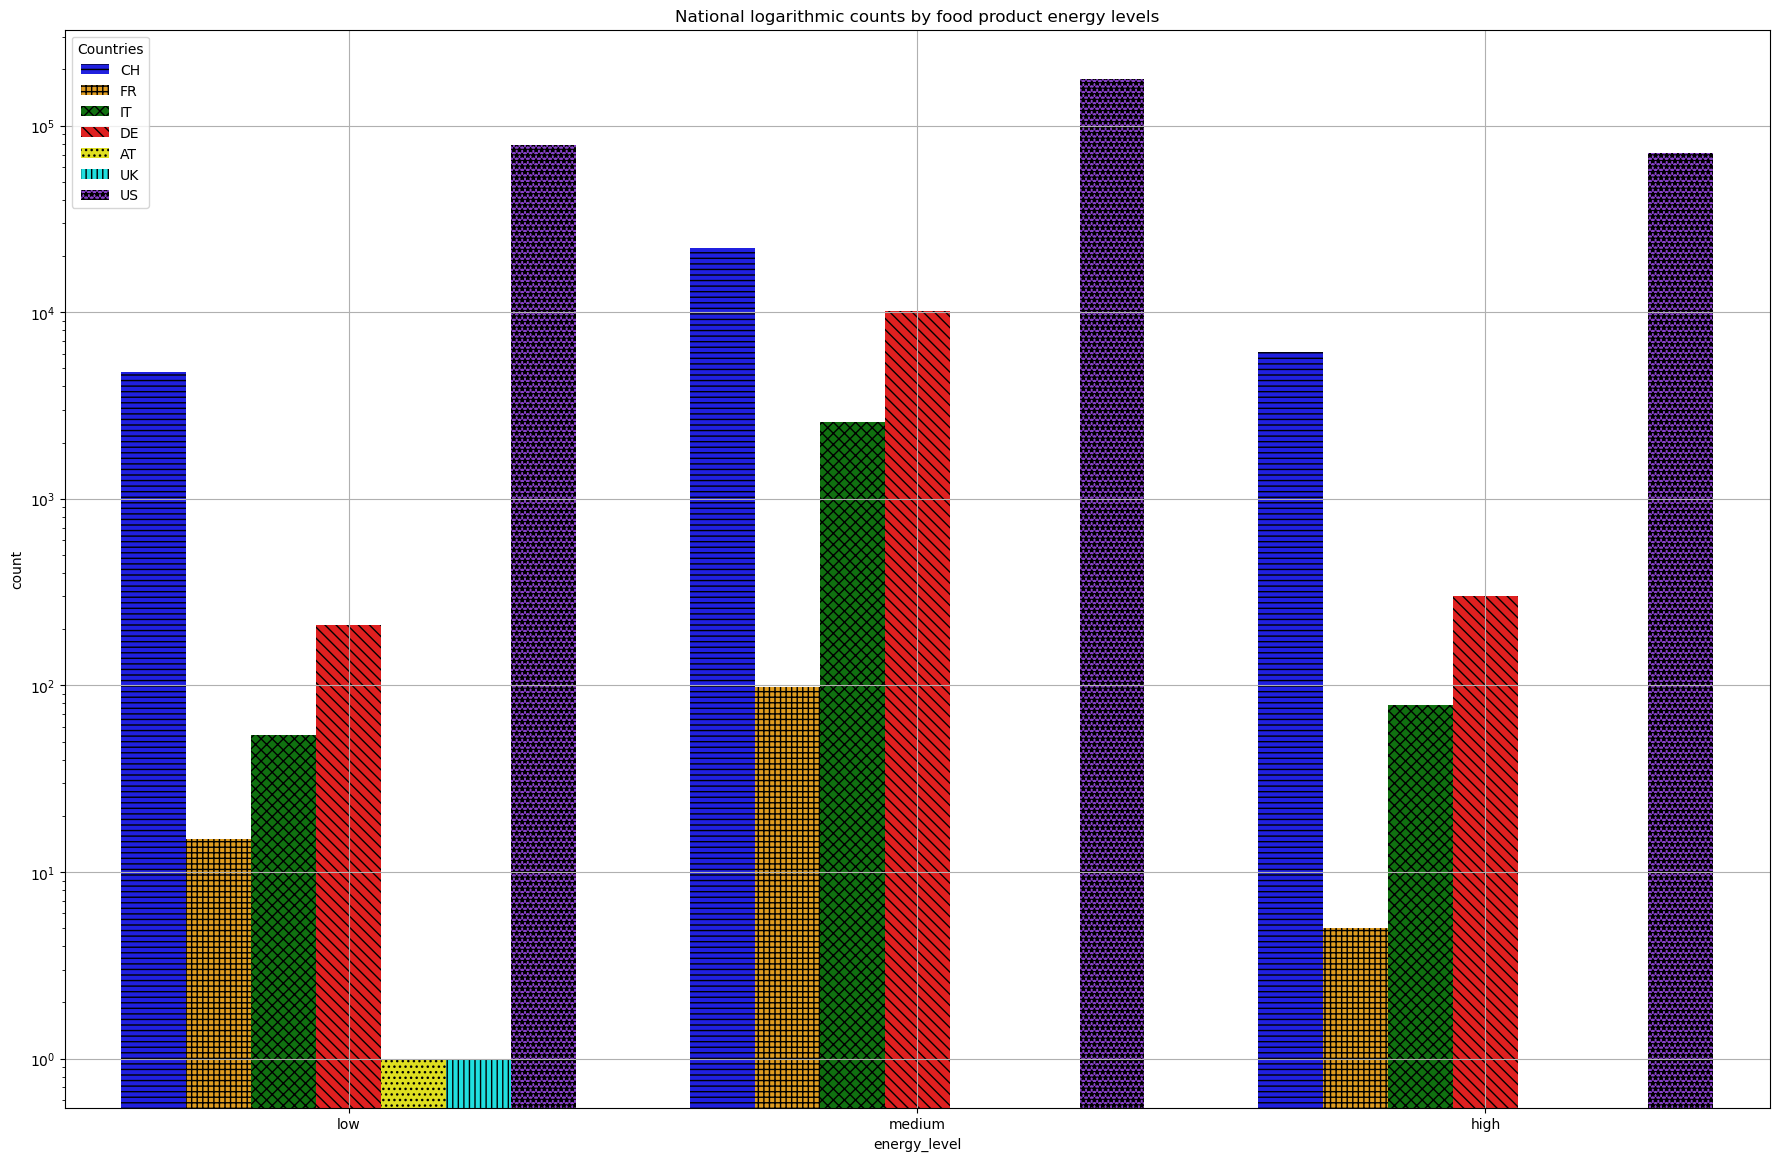

In [25]:
chcolor = 'blue'
decolor = 'orange'
frcolor = 'green'
itcolor = 'red'
#uscolor = 'purple'
#uscolor = 'magenta'
#uscolor = 'pink'
atcolor = 'yellow'
ukcolor = 'cyan'
uscolor = 'blueviolet'

palette_colors = [chcolor,decolor,frcolor,itcolor,atcolor,ukcolor,uscolor]

plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=(22,14))

ax = sns.countplot(data=df,x='energy_level',hue='country', order=['low','medium','high'], palette=palette_colors)

ax.set_yscale('log')

ax.set(title='National logarithmic counts by food product energy levels')

hatches = ['-', '+', 'x', '\\', '.', '|', '*']

for hatch_pattern, these_bars in zip(hatches, ax.containers):
    for this_bar in these_bars:
        this_bar.set_hatch(3 * hatch_pattern)

ax.legend(loc='upper left', title='Countries')

plt.grid()  

plt.show()

Lets have a detailed look , thanks to grouping and value_counts method
----------------------------------------------------------------------

On the first result we dont get the desired order :
---------------------------------------------------

In [26]:
df__energy_levels__country = df.groupby('energy_level')['country']
print(df__energy_levels__country.value_counts())

energy_level  country
high          US          70963
              CH           6149
              DE            303
              IT             79
              FR              5
low           US          78571
              CH           4796
              DE            211
              IT             54
              FR             15
              AT              1
              UK              1
medium        US         178755
              CH          22172
              DE          10125
              IT           2586
              FR             98
Name: country, dtype: int64


Lets sort it with following order energy levels ['low', 'medium', 'high'] and coutries ['CH', 'FR', 'IT','DE','AT','UK','US']
------------------------------------------------------------------------------------------------------------------------------

In [27]:
df__energy_levels__country = df.groupby('energy_level')['country'].value_counts(normalize=False)

print(type(df__energy_levels__country))
print("\n\n\n")

df__energy_levels__country.index = (df__energy_levels__country.index.set_levels(pd.CategoricalIndex(df__energy_levels__country.index.levels[0], 
                                                   ordered=True,
                                                   categories=['low', 'medium', 'high']), 
                                                   level=0)
                    .set_levels(pd.CategoricalIndex(df__energy_levels__country.index.levels[1], 
                                                   ordered=True, 
                                                   categories=['CH', 'FR', 'IT','DE','AT','UK','US']), 
                                                   level=1))

df__energy_levels__country = df__energy_levels__country.sort_index()

print("energy_level     country     count")
print("------------------------------------")
print(df__energy_levels__country)

<class 'pandas.core.series.Series'>




energy_level     country     count
------------------------------------
energy_level  country
low           CH           4796
              FR             15
              IT             54
              DE            211
              AT              1
              UK              1
              US          78571
medium        CH          22172
              FR             98
              IT           2586
              DE          10125
              US         178755
high          CH           6149
              FR              5
              IT             79
              DE            303
              US          70963
Name: country, dtype: int64


Now we want to display percent instead of raw values ;
------------------------------------------------------
Here again we want to sort the order of the multi-index serie , with help to method set_levels and with the type CategoricalIndex :
-----------------------------------------------------------------------------------------------------------------------------------

In [28]:
df__energy_levels__country_percent = df.groupby('energy_level')['country'].value_counts(normalize=True)

def round_percent(x):
    return round(x * 100,2)

df__energy_levels__country_percent = df__energy_levels__country_percent.apply(round_percent)

#...............................................................

df__energy_levels__country_percent.index = (df__energy_levels__country_percent.index.set_levels(pd.CategoricalIndex(df__energy_levels__country_percent.index.levels[0], 
                                                   ordered=True,
                                                   categories=['low', 'medium', 'high']), 
                                                   level=0)
                    .set_levels(pd.CategoricalIndex(df__energy_levels__country_percent.index.levels[1], 
                                                   ordered=True, 
                                                   categories=['CH', 'FR', 'IT','DE','AT','UK','US']), 
                                                   level=1))

df__energy_levels__country_percent = df__energy_levels__country_percent.sort_index()

print("energy_level     country     percent")
print("------------------------------------")
print(df__energy_levels__country_percent)

energy_level     country     percent
------------------------------------
energy_level  country
low           CH          5.73
              FR          0.02
              IT          0.06
              DE          0.25
              AT          0.00
              UK          0.00
              US         93.93
medium        CH         10.37
              FR          0.05
              IT          1.21
              DE          4.74
              US         83.63
high          CH          7.93
              FR          0.01
              IT          0.10
              DE          0.39
              US         91.57
Name: country, dtype: float64


Now we want to have the countries in the left column. We obtain a multi-index with energy_level right-side from country column.
--------------------------------------------------------------------------------------------------------------------------------

In [29]:
df__country_energy_levels = df.groupby('country')['energy_level'].value_counts()

columns_lmh = ['low', 'medium', 'high']

df__country_energy_levels = df__country_energy_levels.unstack().reindex(columns_lmh, axis='columns').stack()

print("country     energy_level   value_counts")
print("---------------------------------------")

print(df__country_energy_levels)
print(type(df__country_energy_levels))

country     energy_level   value_counts
---------------------------------------
country  energy_level
AT       low                  1.0
CH       low               4796.0
         medium           22172.0
         high              6149.0
DE       low                211.0
         medium           10125.0
         high               303.0
FR       low                 15.0
         medium              98.0
         high                 5.0
IT       low                 54.0
         medium            2586.0
         high                79.0
UK       low                  1.0
US       low              78571.0
         medium          178755.0
         high             70963.0
dtype: float64
<class 'pandas.core.series.Series'>


Getting a dataframe from a multi-indexed serie
----------------------------------------------

In [30]:
print(df__country_energy_levels.unstack())
print(type(df__country_energy_levels.unstack()))

energy_level      low    medium     high
country                                 
AT                1.0       NaN      NaN
CH             4796.0   22172.0   6149.0
DE              211.0   10125.0    303.0
FR               15.0      98.0      5.0
IT               54.0    2586.0     79.0
UK                1.0       NaN      NaN
US            78571.0  178755.0  70963.0
<class 'pandas.core.frame.DataFrame'>


Displaying the previous dataframe with transpose method
--------------------------------------------------------

In [31]:
transpose_df__country_energy_levels_unstacked = df__country_energy_levels.unstack().transpose()
print(transpose_df__country_energy_levels_unstacked)

country        AT       CH       DE    FR      IT   UK        US
energy_level                                                    
low           1.0   4796.0    211.0  15.0    54.0  1.0   78571.0
medium        NaN  22172.0  10125.0  98.0  2586.0  NaN  178755.0
high          NaN   6149.0    303.0   5.0    79.0  NaN   70963.0


In [32]:
df__country_energy_levels_percent = df.groupby('country')['energy_level'].value_counts(normalize=True) 

def give_percent(x):
    return round(x * 100,2)

df__country_energy_levels_percent = df__country_energy_levels_percent.apply(give_percent)

print("country     energy_level   percent")
print("----------------------------------")

print(df__country_energy_levels_percent)
print(type(df__country_energy_levels_percent))

country     energy_level   percent
----------------------------------
country  energy_level
AT       low             100.00
CH       medium           66.95
         high             18.57
         low              14.48
DE       medium           95.17
         high              2.85
         low               1.98
FR       medium           83.05
         low              12.71
         high              4.24
IT       medium           95.11
         high              2.91
         low               1.99
UK       low             100.00
US       medium           54.45
         low              23.93
         high             21.62
Name: energy_level, dtype: float64
<class 'pandas.core.series.Series'>


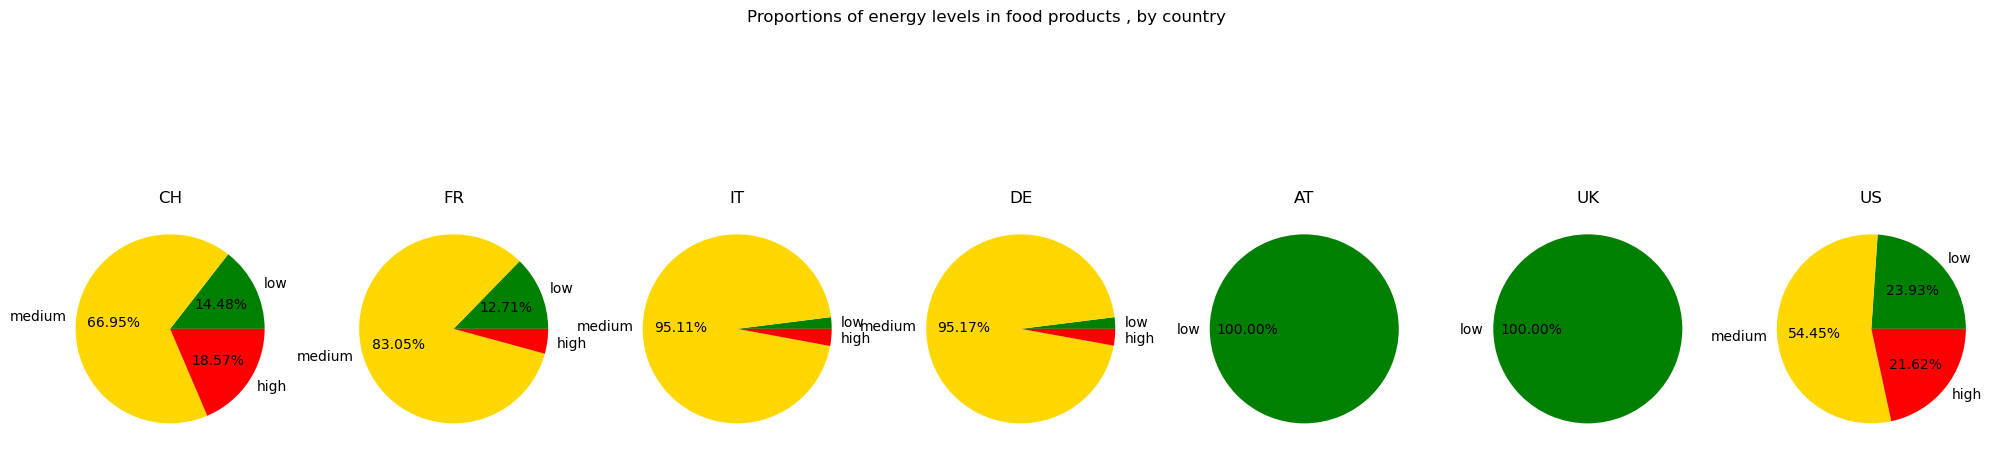

In [33]:
df_chart = df__energy_levels__country.unstack()

THRESHOLD_PERCENT_DISPLAY = 10

autopct = lambda v: f'{v:.2f}%' if v > THRESHOLD_PERCENT_DISPLAY else None

axs = df_chart.plot.pie(subplots=True, figsize=(25,15), autopct=autopct, layout=(3,7), legend= False, title=df_chart.columns.tolist(), colors = ['g','gold','r'])

ax_flat = axs.flatten()

for ax in ax_flat:
    ax.yaxis.label.set_visible(False)
    
plt.suptitle("Proportions of energy levels in food products , by country ")

plt.show()

Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We display the contingency table with crosstab method
------------------------------------------------------

In [34]:
dfObserved = pd.crosstab(df.country, df.energy_level)
dfObserved

energy_level,high,low,medium
country,,,
AT,0,1,0
CH,6149,4796,22172
DE,303,211,10125
FR,5,15,98
IT,79,54,2586
UK,0,1,0
US,70963,78571,178755


Lets have a look on the proportions
-----------------------------------

In [35]:
dfObserved_percent_str = pd.crosstab(df.country, df.energy_level, normalize='index').mul(100).round(1).astype(str) + ' %'
dfObserved_percent_str

energy_level,high,low,medium
country,,,
AT,0.0 %,100.0 %,0.0 %
CH,18.6 %,14.5 %,67.0 %
DE,2.8 %,2.0 %,95.2 %
FR,4.2 %,12.7 %,83.1 %
IT,2.9 %,2.0 %,95.1 %
UK,0.0 %,100.0 %,0.0 %
US,21.6 %,23.9 %,54.5 %


Due to Cochran criterion which requires that all element should be >= 5 , we have to exclude Austria and UnitedKingdom to this test to go further.
==================================================================================================================================================

In [36]:
dfObserved = dfObserved.drop(['AT','UK'])

dfObserved

energy_level,high,low,medium
country,,,
CH,6149,4796,22172
DE,303,211,10125
FR,5,15,98
IT,79,54,2586
US,70963,78571,178755


Now we import method chi2_contingency from library scipy to test if there is there is relationship between the energy level and the country. 
---------------------------------------------------------------------------------------------------------------------------------------------
This is called chi-square test for independence, also called Pearson's chi-square test or the chi-square test of association.
-----------------------------------------------------------------------------------------------------------------------------
Lets test the association . The null hupothesis is there is no effect of energy level of the food product and the country where it comes from.
----------------------------------------------------------------------------------------------------------------------------------------------


Hypothesis null H0 is that country and energy level are independant. Hypothesis alternative Ha is that country and energy level are NOT independant. Lets check it ...
========================================================================================================================================================================

We need to get the Khi squarre to check the independance  hypothesis that's wy we need to import chi2_contingency method from the library scipy
------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
from scipy.stats import chi2_contingency

#Chi-Statistic, P-Value, Degrees of Freedom and the expected frequencies
results =  stats.chi2_contingency(dfObserved.values)

chi2  = results[0] 
pv    = results[1]
free  = results[2]
efreq = results[3]

dfExpected = pd.DataFrame(efreq, columns=dfObserved.columns, index = dfObserved.index)

dfExpected = dfExpected.round(1)

dfExpected

energy_level,high,low,medium
country,,,
CH,6846.2,7389.4,18881.4
DE,2199.4,2373.9,6065.7
FR,24.4,26.3,67.3
IT,562.1,606.7,1550.2
US,67866.9,73250.8,187171.4


We obtain chi2 and the degree of freedom to interpret it properly
-----------------------------------------------------------------

In [38]:
print(f"    chi2    {round(chi2,3)}      \n   pv {pv}   \n     free {free}     \n  efreq  {efreq}   ")

    chi2    10428.097      
   pv 0.0   
     free 8     
  efreq  [[6.84624597e+03 7.38935905e+03 1.88813950e+04]
 [2.19939037e+03 2.37386813e+03 6.06574150e+03]
 [2.43940280e+01 2.63292076e+01 6.72767644e+01]
 [5.62096289e+02 6.06687419e+02 1.55021629e+03]
 [6.78668733e+04 7.32507562e+04 1.87171370e+05]]   


Lets have a look on KHI squarre table which is a reference easily available over internet 
=========================================================================================

In [39]:
print('''
a= alpha isk
df= degree freedom


  a|0.995 	0.99 	0.975 	0.95 	0.90 	0.10 	\x1b[31m0.05\x1b[0m 	0.025 	0.01 	0.005
df | 	
__________________________________________________________________________________
1 	--- 	--- 	0.001 	0.004 	0.016 	2.706 	3.841 	5.024 	6.635 	7.879

2 	0.010 	0.020 	0.051 	0.103 	0.211 	4.605 	5.991 	7.378 	9.210 	10.597

3 	0.072 	0.115 	0.216 	0.352 	0.584 	6.251 	7.815 	9.348 	11.345 	12.838

4 	0.207 	0.297 	0.484 	0.711 	1.064 	7.779 	9.488 	11.143 	13.277 	14.860

5 	0.412 	0.554 	0.831 	1.145 	1.610 	9.236 	11.070 	12.833 	15.086 	16.750

6 	0.676 	0.872 	1.237 	1.635 	2.204 	10.645 	12.592 	14.449 	16.812 	18.548

7 	0.989 	1.239 	1.690 	2.167 	2.833 	12.017 	14.067 	16.013 	18.475 	20.278

\x1b[31m8\x1b[0m 	1.344 	1.646 	2.180 	2.733 	3.490 	13.362 	\x1b[31m15.507\x1b[0m 17.535  20.090	21.955

9 	1.735 	2.088 	2.700 	3.325 	4.168 	14.684 	16.919 	19.023 	21.666 	23.589

10 	2.156 	2.558 	3.247 	3.940 	4.865 	15.987 	18.307 	20.483 	23.209 	25.188

...
''')


a= alpha isk
df= degree freedom


  a|0.995 	0.99 	0.975 	0.95 	0.90 	0.10 	0.05 	0.025 	0.01 	0.005
df | 	
__________________________________________________________________________________
1 	--- 	--- 	0.001 	0.004 	0.016 	2.706 	3.841 	5.024 	6.635 	7.879

2 	0.010 	0.020 	0.051 	0.103 	0.211 	4.605 	5.991 	7.378 	9.210 	10.597

3 	0.072 	0.115 	0.216 	0.352 	0.584 	6.251 	7.815 	9.348 	11.345 	12.838

4 	0.207 	0.297 	0.484 	0.711 	1.064 	7.779 	9.488 	11.143 	13.277 	14.860

5 	0.412 	0.554 	0.831 	1.145 	1.610 	9.236 	11.070 	12.833 	15.086 	16.750

6 	0.676 	0.872 	1.237 	1.635 	2.204 	10.645 	12.592 	14.449 	16.812 	18.548

7 	0.989 	1.239 	1.690 	2.167 	2.833 	12.017 	14.067 	16.013 	18.475 	20.278

8 	1.344 	1.646 	2.180 	2.733 	3.490 	13.362 	15.507 17.535  20.090	21.955

9 	1.735 	2.088 	2.700 	3.325 	4.168 	14.684 	16.919 	19.023 	21.666 	23.589

10 	2.156 	2.558 	3.247 	3.940 	4.865 	15.987 	18.307 	20.483 	23.209 	25.188

...



In [40]:
strA = f" <h2>In our case, we have  <font color='green'> {free} </font>  degrees of freedom;  alpha selected for <font color='grey'> 0.05 </font> as a common standard value <br>  </h2>"
strB = f" <h2>The theorical table has a threshold at <font color='blue'> 15.507 </font> ,  we have a rounded Khi square much more greater processessed at <font color='red'> {round(chi2,3)} </font> <br>  </h2>"
strC = f" <h2> So we can reject hypothesis H0, so the food energy levels are   <font color='red'> NOT independant </font>  from the countries.<br> </h2>"
strD = f" <h2> To dig investigation deeper, it is possible to use    <font color='gold'> Cramer's V test </font> for study the strenght of this association, this task was not expected in this exercice. </h2>"

strZ = strA + strB + strC + strD

md(strZ)

 <h2>In our case, we have  <font color='green'> 8 </font>  degrees of freedom;  alpha selected for <font color='grey'> 0.05 </font> as a common standard value <br>  </h2> <h2>The theorical table has a threshold at <font color='blue'> 15.507 </font> ,  we have a rounded Khi square much more greater processessed at <font color='red'> 10428.097 </font> <br>  </h2> <h2> So we can reject hypothesis H0, so the food energy levels are   <font color='red'> NOT independant </font>  from the countries.<br> </h2> <h2> To dig investigation deeper, it is possible to use    <font color='gold'> Cramer's V test </font> for study the strenght of this association, this task was not expected in this exercice. </h2>